# Synthetic ECG sample maker
IMPORTANT: this notebook requires neurokit2 in the environment

In [1]:
import copy
import math
import collections
from scipy import interpolate as interp
from scipy import signal
import scipy
import pandas as pd
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import neurokit2 as nk
import resurfemg
import random

In [9]:
t_ecg = 100
ecg_sample_rate = 2048

In [14]:


hr= random.randint(60, 100)

part_ecg = nk.ecg_simulate(duration=t_ecg, sampling_rate=int(ecg_sample_rate*1.5), heart_rate=hr) 

In [15]:
hr

98

In [11]:
part_ecg

array([ 1.02046096,  1.01979708,  1.01872217, ..., -0.09781365,
       -0.09863291, -0.10269403])

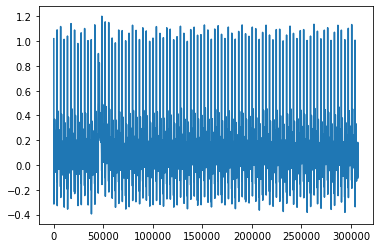

In [12]:
plt.plot(part_ecg)

Now we will make an 2D array of these

In [16]:
two_d = []
t_ecg = 100
ecg_sample_rate = 2048
for i in list(range(10)):
    hr = random.randint(60, 100)
    part_ecg = nk.ecg_simulate(duration=t_ecg, sampling_rate=int(ecg_sample_rate*1.5), heart_rate=hr) 
    two_d.append(part_ecg)
    
two_d = np.array(two_d)

[array([ 1.10864031,  1.10769941,  1.10593187, ..., -0.0164264 ,
        -0.01515372, -0.01188288]),
 array([ 1.07490788,  1.07413054,  1.07276797, ..., -0.02676258,
        -0.02599001, -0.02600683]),
 array([1.0905033 , 1.08963042, 1.08803896, ..., 0.17034837, 0.16871723,
        0.16325723]),
 array([1.08500183, 1.08414673, 1.08260148, ..., 0.86928999, 0.88330257,
        0.89957518]),
 array([1.09950453, 1.0987279 , 1.09727632, ..., 0.20582388, 0.20699887,
        0.20905636]),
 array([1.10236493, 1.10146253, 1.09980615, ..., 1.08863836, 1.08416101,
        1.07494968]),
 array([1.09583083, 1.0950761 , 1.09373848, ..., 0.23122073, 0.22976032,
        0.22989796]),
 array([ 1.0823908 ,  1.08155993,  1.08007116, ...,  0.00147896,
        -0.01334914, -0.02571922]),
 array([1.10292158, 1.10205968, 1.10048953, ..., 0.10328884, 0.08646864,
        0.07111963]),
 array([ 1.05857619,  1.05783385,  1.05657379, ..., -0.07744414,
        -0.07731265, -0.07955651])]

In [19]:
two_d = np.array(two_d)
two_d.shape

(10, 307200)

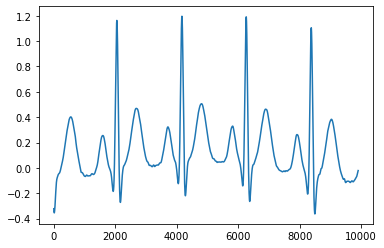

In [21]:
plt.plot(two_d[5][100:10000])

In [23]:
np.save('../synth_data/synth_ecg_array',two_d,allow_pickle=False, fix_imports=True)
